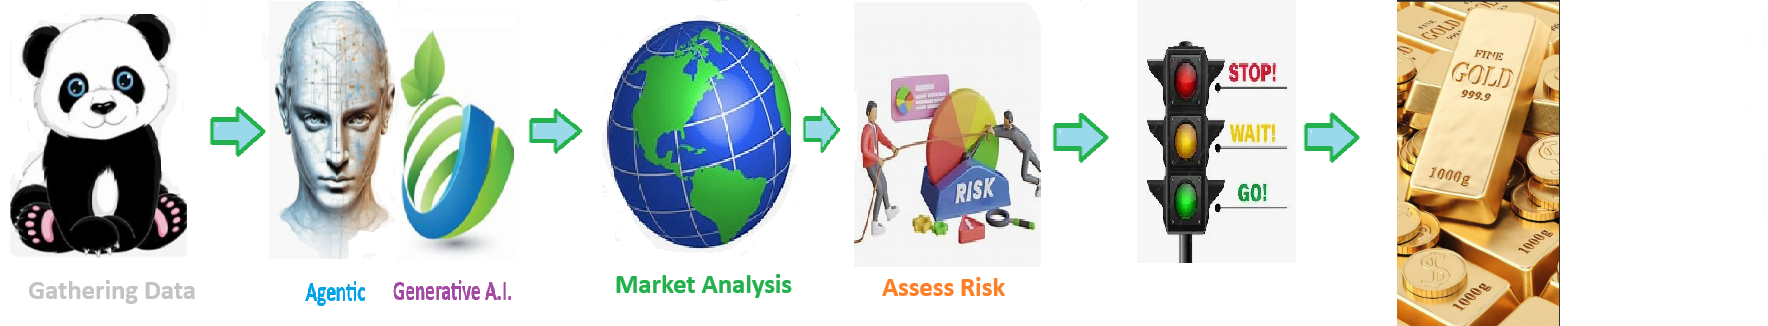

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import story_board as sb 
import time
from IPython.display import Markdown, display, Image
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2026-01-14 at 16:51:39.653846


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'MidasTouch'

## Optional Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process MidasTouch Step 0 - Initializing and starting Logging Process.


In [4]:
definition ='''
## 💰  Midas Touch 💰 

**Learning** to trade Gold Futures

#### King Midas

King Midas was a legendary king granted a wish that everything he touched would turn to gold.
At first delighted, he soon realized the gift was a curse when food, drink, and even his daughter turned to gold.
The myth serves as a warning about greed and the unintended consequences of valuing wealth over human life.

'''

sb.start_story(definition)


## 💰  Midas Touch 💰 

**Learning** to trade Gold Futures

#### King Midas

King Midas was a legendary king granted a wish that everything he touched would turn to gold.
At first delighted, he soon realized the gift was a curse when food, drink, and even his daughter turned to gold.
The myth serves as a warning about greed and the unintended consequences of valuing wealth over human life.



In [5]:
definition ='''

##  💹 🟡 Five Critical Steps to Day Trading Gold Futures (Directional, Risk-Gated)

## 1️⃣ Gather High-Quality, Timely Market Data  
Collect real-time or near-real-time data for gold futures (price, volume, volatility), spot gold, U.S. Dollar Index (DXY), Treasury yields, and the economic calendar (CPI, Fed events).  
**Goal:** Identify today’s drivers and volatility windows.

---

## 2️⃣ Analyze Market Direction and Trade Thesis  
Establish an intraday bias (bullish, bearish, or neutral) using trend (VWAP, moving averages), momentum (RSI, MACD), volatility, and key price levels (overnight range, prior close).  
**Output:** A clear *trade thesis* with invalidation levels.

---

## 3️⃣ Risk & Confidence Gate (GO / NO-GO DECISION)  
Evaluate whether the trade meets minimum risk-quality standards before entry:
- Risk-to-reward threshold (e.g., ≥ 2:1)
- Volatility vs stop distance
- Time-of-day liquidity
- News proximity risk
- Signal confidence score (historical win rate, setup quality)

**Decision:**  
- ✅ **GO** → proceed to execution  
- ❌ **NO-GO** → stand down

**Goal:** Only trade *high-quality risk opportunities*.

---

## 4️⃣ Position Sizing & Execution (Kelly-Informed)  
Determine position size using **fractional Kelly**, based on:
- Estimated win probability
- Average win vs loss
- Account risk limits

Then execute via market or limit orders at pre-defined levels (breakout, pullback, VWAP reclaim).

**Goal:** Size intelligently while respecting execution discipline.

---

## 5️⃣ Exit Safely and Lock in Profit  
Scale out, trail stops, or exit at predefined targets or momentum exhaustion—never let winners reverse into losses.  
Flatten exposure by session end.

**Goal:** Capital preservation, consistency, and controlled profitability.

---

### 🔑 Key Insight
- **Kelly does NOT decide whether to trade**
- **Kelly decides how much to trade**
- The **GO / NO-GO gate decides if the trade deserves capital at all**

> *No trade is a position.*

---

### 🔑 Core Principle  
**Direction first. Risk second. Execution third. Profit follows.**


'''

sb.outmd(definition)



##  💹 🟡 Five Critical Steps to Day Trading Gold Futures (Directional, Risk-Gated)

## 1️⃣ Gather High-Quality, Timely Market Data  
Collect real-time or near-real-time data for gold futures (price, volume, volatility), spot gold, U.S. Dollar Index (DXY), Treasury yields, and the economic calendar (CPI, Fed events).  
**Goal:** Identify today’s drivers and volatility windows.

---

## 2️⃣ Analyze Market Direction and Trade Thesis  
Establish an intraday bias (bullish, bearish, or neutral) using trend (VWAP, moving averages), momentum (RSI, MACD), volatility, and key price levels (overnight range, prior close).  
**Output:** A clear *trade thesis* with invalidation levels.

---

## 3️⃣ Risk & Confidence Gate (GO / NO-GO DECISION)  
Evaluate whether the trade meets minimum risk-quality standards before entry:
- Risk-to-reward threshold (e.g., ≥ 2:1)
- Volatility vs stop distance
- Time-of-day liquidity
- News proximity risk
- Signal confidence score (historical win rate, setup quality)

**Decision:**  
- ✅ **GO** → proceed to execution  
- ❌ **NO-GO** → stand down

**Goal:** Only trade *high-quality risk opportunities*.

---

## 4️⃣ Position Sizing & Execution (Kelly-Informed)  
Determine position size using **fractional Kelly**, based on:
- Estimated win probability
- Average win vs loss
- Account risk limits

Then execute via market or limit orders at pre-defined levels (breakout, pullback, VWAP reclaim).

**Goal:** Size intelligently while respecting execution discipline.

---

## 5️⃣ Exit Safely and Lock in Profit  
Scale out, trail stops, or exit at predefined targets or momentum exhaustion—never let winners reverse into losses.  
Flatten exposure by session end.

**Goal:** Capital preservation, consistency, and controlled profitability.

---

### 🔑 Key Insight
- **Kelly does NOT decide whether to trade**
- **Kelly decides how much to trade**
- The **GO / NO-GO gate decides if the trade deserves capital at all**

> *No trade is a position.*

---

### 🔑 Core Principle  
**Direction first. Risk second. Execution third. Profit follows.**




In [6]:
definition ='''
## 🟡 Top Data Points for Evaluating Gold Futures

1. **Spot Gold Price** — The **current cash market price** of gold, which anchors futures contracts and reflects immediate supply and demand.
2. **Futures Curve (Contango/Backwardation)** — Shows how **future delivery prices** compare to spot, indicating storage costs, interest rates, and market expectations.
3. **U.S. Dollar Index (DXY)** — Gold is priced in dollars, so a **stronger dollar** usually puts downward pressure on gold prices.
4. **Real Interest Rates** — **Rising real yields** make non-yielding assets like gold less attractive, while falling real rates support higher gold prices.
5. **Inflation Expectations** — Gold often rises when investors **expect inflation to erode** the purchasing power of fiat currencies.
6. **Central Bank Gold Purchases** — **Large-scale buying or selling by central banks** significantly affects global demand and long-term price trends.
7. **COMEX Open Interest** — Measures **how many gold futures contracts are active**, signaling speculative and hedging interest in the market.
8. **ETF Gold Holdings (e.g., GLD)** — Inflows and outflows from gold **ETFs** reflect institutional and retail **investor sentiment toward gold**.
9. **Geopolitical Risk Index** — Wars, sanctions, and **global instability** increase safe-haven demand for gold.
10. **Mining Supply and Production Costs** — Changes in **gold output and extraction costs** affect long-term supply and price floors.
'''

sb.outmd(definition)


## 🟡 Top Data Points for Evaluating Gold Futures

1. **Spot Gold Price** — The **current cash market price** of gold, which anchors futures contracts and reflects immediate supply and demand.
2. **Futures Curve (Contango/Backwardation)** — Shows how **future delivery prices** compare to spot, indicating storage costs, interest rates, and market expectations.
3. **U.S. Dollar Index (DXY)** — Gold is priced in dollars, so a **stronger dollar** usually puts downward pressure on gold prices.
4. **Real Interest Rates** — **Rising real yields** make non-yielding assets like gold less attractive, while falling real rates support higher gold prices.
5. **Inflation Expectations** — Gold often rises when investors **expect inflation to erode** the purchasing power of fiat currencies.
6. **Central Bank Gold Purchases** — **Large-scale buying or selling by central banks** significantly affects global demand and long-term price trends.
7. **COMEX Open Interest** — Measures **how many gold futures contracts are active**, signaling speculative and hedging interest in the market.
8. **ETF Gold Holdings (e.g., GLD)** — Inflows and outflows from gold **ETFs** reflect institutional and retail **investor sentiment toward gold**.
9. **Geopolitical Risk Index** — Wars, sanctions, and **global instability** increase safe-haven demand for gold.
10. **Mining Supply and Production Costs** — Changes in **gold output and extraction costs** affect long-term supply and price floors.


In [7]:
definition ='''
## What are gold ETF's 

**Gold ETFs (Exchange-Traded Funds)** are investment funds that let you buy and sell exposure to the price of gold on the stock market without having to physically own or store gold.

They work by either holding physical **gold in vaults (like GLD or IAU)** or by holding gold futures contracts, and each share represents a fractional claim on that gold or its price movement.
Gold ETFs make it easy for investors to **trade gold like a stock**, use it for **inflation protection**, portfolio diversification, or as a **safe-haven** asset during economic uncertainty.
'''
sb.outmd(definition)


## What are gold ETF's 

**Gold ETFs (Exchange-Traded Funds)** are investment funds that let you buy and sell exposure to the price of gold on the stock market without having to physically own or store gold.

They work by either holding physical **gold in vaults (like GLD or IAU)** or by holding gold futures contracts, and each share represents a fractional claim on that gold or its price movement.
Gold ETFs make it easy for investors to **trade gold like a stock**, use it for **inflation protection**, portfolio diversification, or as a **safe-haven** asset during economic uncertainty.


In [8]:
definition ='''
# 💰 Spot Gold Price 🪙

The **spot gold price** is the **current market price** for immediate delivery of gold, reflecting real-time supply and demand in global bullion markets. It is reported continuously by major commodity exchanges and data providers such as the London Bullion Market Association (LBMA), COMEX, and financial platforms like Bloomberg, Reuters, and major market websites.

import yfinance as yf

gold = yf.Ticker("XAUUSD=X")
price = gold.history(period="1d")["Close"].iloc[-1]

print(f"Spot Gold Price (USD/oz): {price}")


'''
sb.outmd(definition)


# 💰 Spot Gold Price 🪙

The **spot gold price** is the **current market price** for immediate delivery of gold, reflecting real-time supply and demand in global bullion markets. It is reported continuously by major commodity exchanges and data providers such as the London Bullion Market Association (LBMA), COMEX, and financial platforms like Bloomberg, Reuters, and major market websites.

import yfinance as yf

gold = yf.Ticker("XAUUSD=X")
price = gold.history(period="1d")["Close"].iloc[-1]

print(f"Spot Gold Price (USD/oz): {price}")




In [9]:
import yfinance as yf

In [10]:
first_install = False 
if first_install: 
    !pip install yfinance

In [11]:
# gold = yf.Ticker("XAUUSD=X")
# price = gold.history(period="1d")["Close"].iloc[-1]
# print(f"Spot Gold Price (USD/oz): {price}")


In [12]:
import yfinance as yf

gold = yf.Ticker("XAUUSD=X")
hist = gold.history(period="7d")   # ← key change

if hist.empty:
    print("Gold price data not available.")
else:
    price = hist["Close"].iloc[-1]
    print(f"Spot Gold Price (USD/oz): {price:.2f}")

Gold price data not available.


In [13]:
# import yfinance as yf

# gold = yf.Ticker("XAUUSD=X")
# hist = gold.history(period="1mo")   # ← longer window

# if hist.empty:
#     raise RuntimeError("No gold price data returned from Yahoo Finance")

# price = hist["Close"].dropna().iloc[-1]
# print(f"Spot Gold Price (USD/oz): {price:.2f}")

In [14]:
# import yfinance as yf

# df = yf.download("XAUUSD=X", period="1mo", interval="1d", progress=False, threads=False)

# print(df.tail())
# print("rows:", len(df))

# if len(df) == 0:
#     raise RuntimeError("Still no data returned from Yahoo")

# price = df["Close"].dropna().iloc[-1]
# print("Spot Gold (USD/oz):", float(price))

## Step 0 - Process End - display log

In [15]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2026-01-14 16:51:39,788 - INFO - START MidasTouch =============================================
2026-01-14 16:51:39,788 - INFO - START MidasTouch Start Time = 2026-01-14 16:51:39
2026-01-14 16:51:39,788 - INFO - MidasTouch Step 0 - Initialize the configuration file parser
2026-01-14 16:51:39,788 - INFO - Process MidasTouch Step 0 - Initializing and starting Logging Process.
2026-01-14 16:51:41,769 - ERROR - HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: XAUUSD=X"}}}
2026-01-14 16:51:42,320 - ERROR - $XAUUSD=X: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")
2026-01-14 16:51:42,464 - INFO - PERFORMANCE MidasTouch The total process duration was:2.68
2026-01-14 16:51:42,464 - INFO - PERFORMANCE MidasTouch Stop Time = 2026-01-14 16:51:42
2026-01-14 16:51:42,464 - INFO - PERFORMANCE MidasTouch Short process duration less than 3 Seconds:2.68
2026-01-14 16:51:42,4

#### https://github.com/JoeEberle/ -- josepheberle@outlook.com